# Francis QR step

### References

* Lawson, C. L,. and Hanson, R. J. (1995). Solving least squares problems. SIAM, ISBN 0-89871-356-0

* Golub, G. H. and C. F. Van Loan, (2013), Matrix computations, 4th edition, Johns Hopkins University Press, ISBN 978-1-4214-0794-4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import plot_functions as plf
import matcomp_algorithms as mca
np.set_printoptions(precision=3, suppress=True)
#np.set_printoptions(suppress=True)

### Definition

Given the unreduced upper Hessenberg matrix $\mathbf{H} \in \mathbb{R}^{N \times N}$, whose trailing 2-by-2 principal submatrix has eigenvalues $a_{0}$ and $a_{1}$, this algorithm overwrites $\mathbf{H}$ with $\mathbf{Z}^{\top}\mathbf{H}\mathbf{Z}$, where $\mathbf{Z}$ is a product of Householder matrices and $\mathbf{Z}^{\top}(\mathbf{H} - a_{0} \, \mathbf{I})(\mathbf{H} - a_{1} \, \mathbf{I})$ is upper triangular.

For details about Householder matrices, take a look at the notebook [`Householder_transformation`](https://github.com/birocoles/Matrix-Computations/blob/main/code/Householder_transformation.ipynb)).

### Create a matrix $\mathbf{A}$

In [3]:
np.random.seed(10)
N = 6

In [4]:
A = np.random.rand(N,N)

### Compute an upper Hessenberg matrix $\mathbf{H}$ from $\mathbf{A}$

In [5]:
H = A.copy()
mca.upper_Hessen_House(H)
H = np.triu(m=H,k=-1)

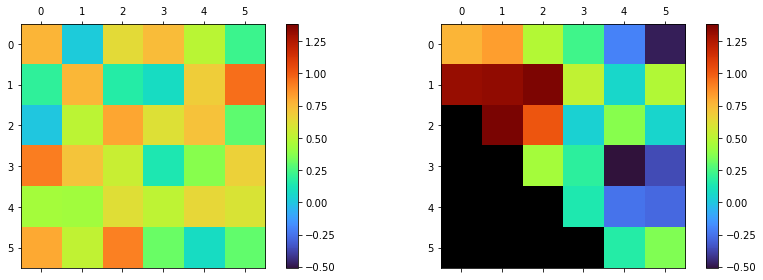

In [6]:
plf.plot_matrices(matrices=[A, H], size=(12,4), tol=1e-15, shape=(1,2))

### Illustrate the Francis QR step

The cell below implements the Algorithm 7.4.2 of Golub and Van Loan (2013, p. 379).

In [7]:
# Compute first column of M = (H - a1 I)(H - a2 I)
s = H[-2,-2] + H[-1,-1]
t = H[-2,-2]*H[-1,-1] - H[-2,-1]*H[-1,-2]
x = H[0,0]*H[0,0] + H[0,1]*H[1,0] - s*H[0,0] + t
y = H[1,0]*(H[0,0] + H[1,1] - s)
z = H[1,0]*H[2,1]

# Compute matrix M
M = H@H - s*H + t*np.eye(N)

In [8]:
P = []
v = []
beta = []
products = [H]
ZTHZ = H.copy()

In [9]:
# Compute the Householder vector and parameter beta
vk, betak = mca.House_vector(x=[x, y, x])

v.append(vk)
beta.append(betak)

# Create the Householder transformation
Pk = np.identity(N)
Pk[:3,:3] -= betak*np.outer(vk,vk)

P.append(Pk)

# Compute the product
ZTHZ = (Pk@ZTHZ)@Pk
products.append(ZTHZ)

x = ZTHZ[1,0]
y = ZTHZ[2,0]
z = ZTHZ[3,0]

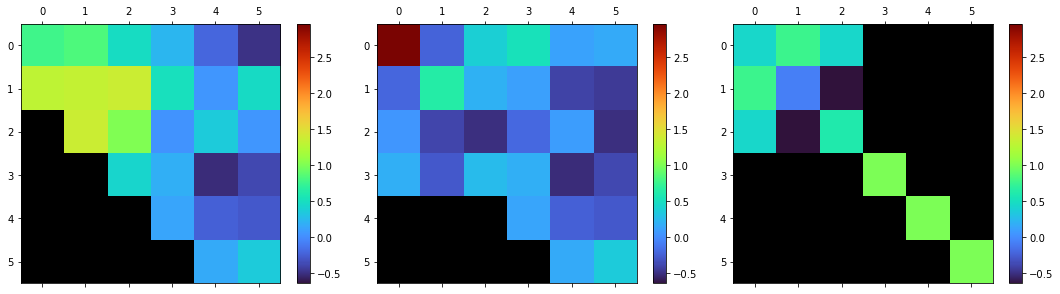

In [10]:
plf.plot_matrices(matrices=[H, ZTHZ, Pk], size=(15,4), tol=1e-15, shape=(1,3))

In [11]:
for k in range(1, N-2):
    # Compute the Householder vector and parameter beta
    vk, betak = mca.House_vector(x=[x,y,z])

    v.append(vk)
    beta.append(betak)

    # Create the Householder transformation
    #print(k)
    Pk = np.identity(N)
    Pk[k:k+3,k:k+3] -= betak*np.outer(vk,vk)

    P.append(Pk)

    # Compute the product
    ZTHZ = (Pk@ZTHZ)@Pk
    products.append(ZTHZ)

    x = ZTHZ[k+1,k]
    y = ZTHZ[k+2,k]
    if k < (N-3):
        z = ZTHZ[k+3,k]

In [12]:
# Compute the Householder vector and parameter beta
vk, betak = mca.House_vector(x=[x, y])

v.append(vk)
beta.append(betak)

# Create the Householder transformation
Pk = np.identity(N)
Pk[N-2:,N-2:] -= betak*np.outer(vk,vk)

P.append(Pk)

# Compute the product
ZTHZ = (Pk@ZTHZ)@Pk
products.append(ZTHZ)

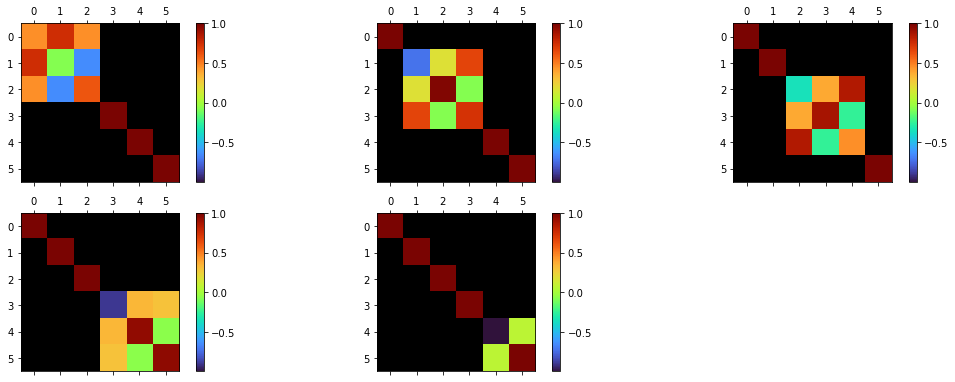

In [13]:
plf.plot_matrices(matrices=P, size=(15,8), tol=1e-15, shape=(3,3))

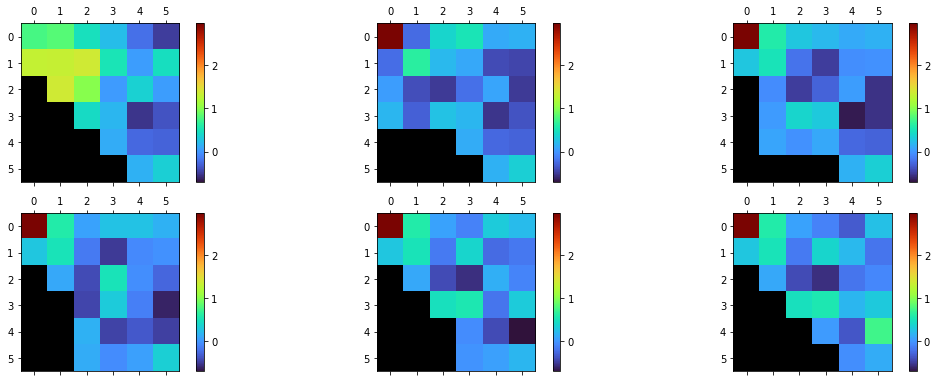

In [14]:
plf.plot_matrices(matrices=products, size=(15,8), tol=1e-15, shape=(3,3))

In [15]:
Z = np.linalg.multi_dot(P)

In [16]:
np.allclose(ZTHZ, Z.T@H@Z)

True

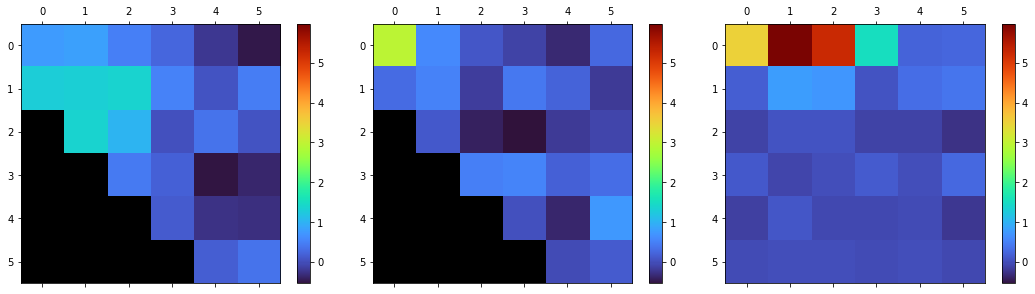

In [17]:
plf.plot_matrices(matrices=[H, ZTHZ, Z.T@M], size=(15,4), tol=1e-8, shape=(1,3))